<a href="https://colab.research.google.com/github/tecatanka/Manufacturing_Systems/blob/main/Holt_Winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing libraries

In [1]:
x=1
y=1
print(x+y)

2


In [29]:
import pandas as pd
from matplotlib import pyplot as plt

# Time series modules from statsmodels

from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing

from statsmodels.tsa.base.prediction import PredictionResults


# Missing values packages

import missingno as msno

# Performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
# Mount drive in collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Accessing file
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/international-airline-passengers.csv', index_col='Month', parse_dates=True)

In [5]:
# Shape of passenger data frame

print(dataset.shape)

(148, 1)


In [6]:
dataset.tail()

,Passengers_Thousands
Month,
1960-12-01,432.0
NaT,NaN
NaT,NaN
NaT,NaN
NaT,NaN


## PLot of data over time

<Axes: title={'center': 'Passengers traveling'}, xlabel='Month'>

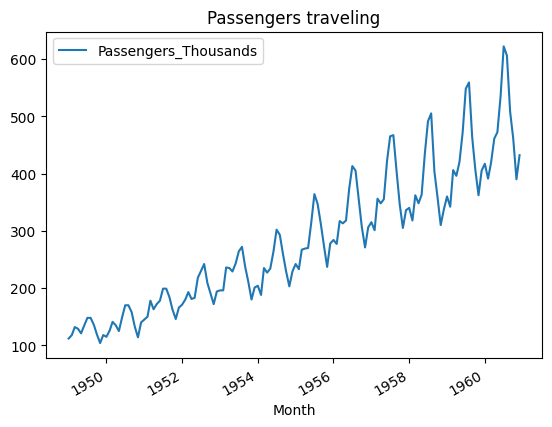

In [7]:
dataset[['Passengers_Thousands']].plot(title="Passengers traveling")

## Inspecting data end partition into training and text sets

In [8]:
# Look for missing values
dataset.isnull().sum()

Passengers_Thousands    4
dtype: int64

<Axes: >

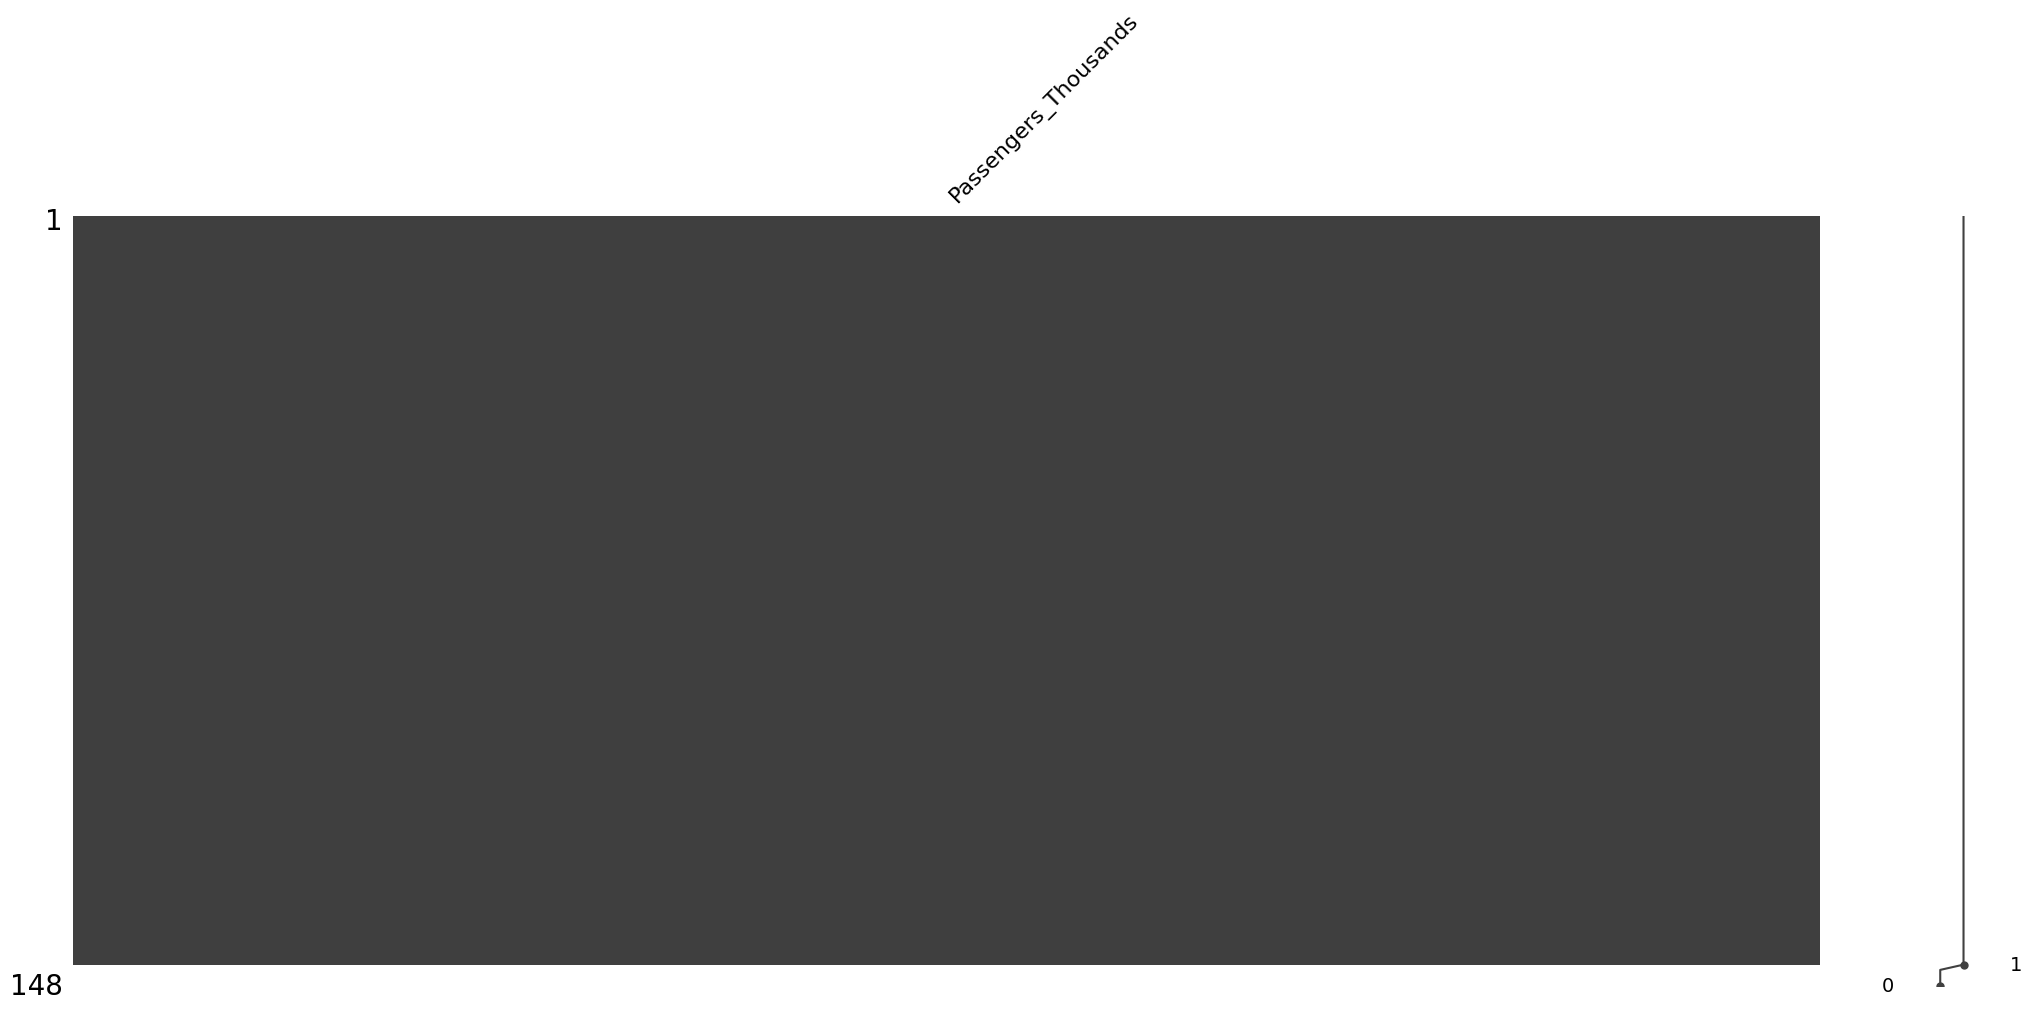

In [9]:
msno.matrix(dataset)

In [10]:
# Eliminate missing values
dataset=dataset.dropna(axis=0, how='any', subset=None, inplace=False)
dataset.tail()

,Passengers_Thousands
Month,
1960-08-01,606.0
1960-09-01,508.0
1960-10-01,461.0
1960-11-01,390.0
1960-12-01,432.0


In [11]:
print(dataset.shape)

(144, 1)


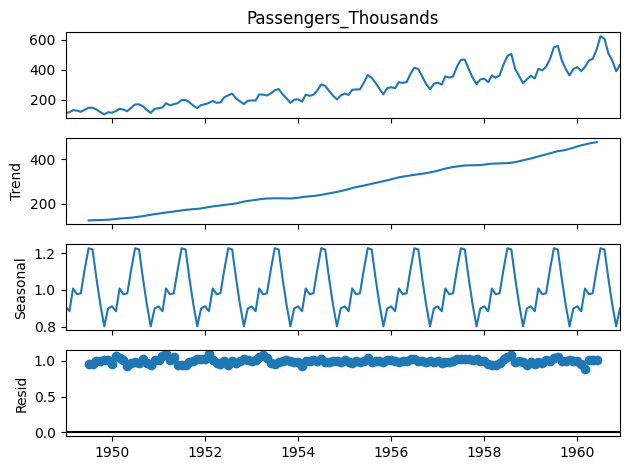

In [13]:
components=seasonal_decompose(dataset['Passengers_Thousands'], model='multiplicative').plot()

### Train and  test sets

In [14]:
passengers=dataset[:115].copy() #Train set
passenger_test=dataset[115:].copy() #Test set

## Single exponential smoothing

In [15]:
# Setting  date time index as monthly

passengers.index.freq='MS'

In [16]:
# Time period and alpha
m=12
alpha=0.3

In [17]:
## Generating values for simple exponential smoothing
passengers["SingleEx"]=SimpleExpSmoothing(passengers['Passengers_Thousands']).fit(smoothing_level=alpha, optimized=False, use_brute=True).fittedvalues

<Axes: title={'center': 'Single Exponential'}, xlabel='Month'>

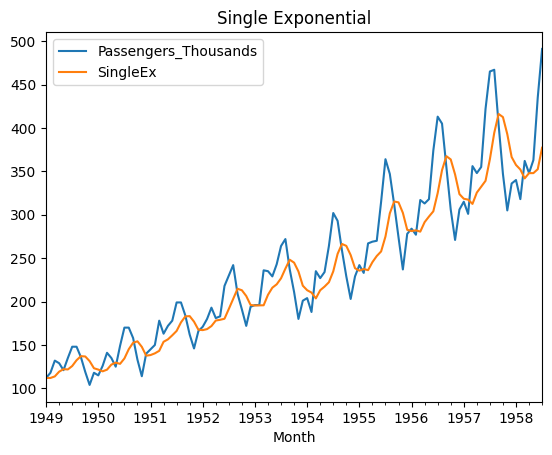

In [18]:
passengers[['Passengers_Thousands', 'SingleEx']].plot(title='Single Exponential')

## Adding multiplicative and additive trend (just because)

In [19]:
passengers['trend_add']=ExponentialSmoothing(passengers['Passengers_Thousands'], trend='add').fit().fittedvalues

In [20]:
passengers['trend_mult']=ExponentialSmoothing(passengers['Passengers_Thousands'], trend='mul').fit().fittedvalues

<Axes: title={'center': 'Holt Winters with additive and multiplicative trend --double exponential smoothing'}, xlabel='Month'>

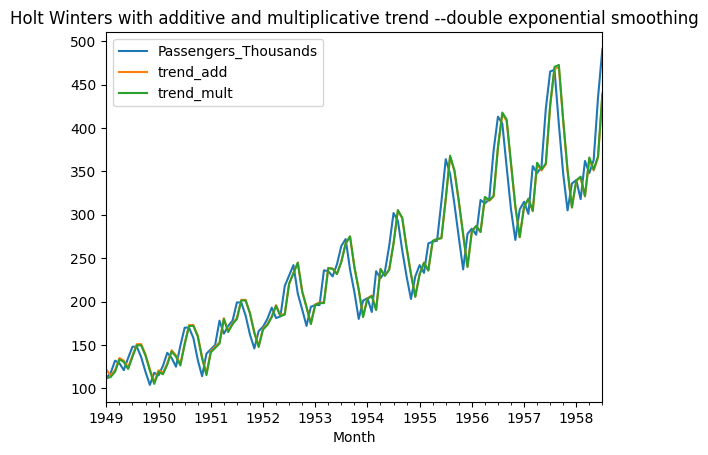

In [21]:
passengers[['Passengers_Thousands','trend_add', 'trend_mult']].plot(title='Holt Winters with additive and multiplicative trend --double exponential smoothing')

## Including seasonality

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Holt Winters with additive and multiplicative trend and seasonality --Triple exponential smoothing'}, xlabel='Month'>

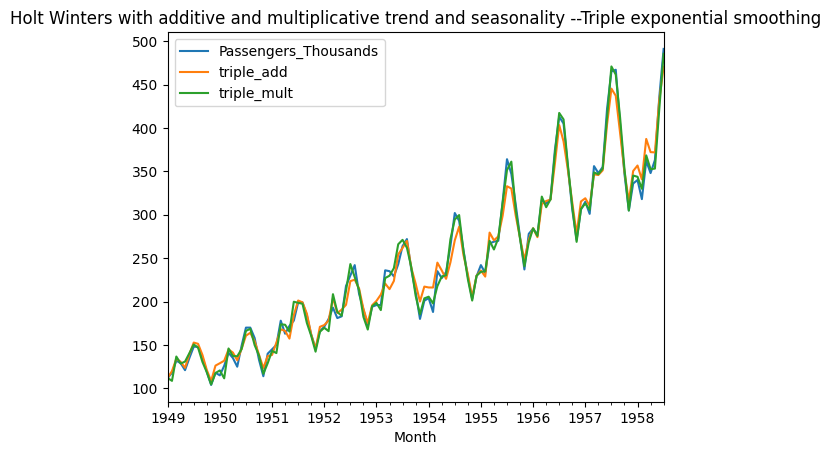

In [22]:
passengers['triple_add']=ExponentialSmoothing(passengers['Passengers_Thousands'], trend='add', seasonal='add', seasonal_periods=12).fit().fittedvalues
passengers['triple_mult']=ExponentialSmoothing(passengers['Passengers_Thousands'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues
passengers[['Passengers_Thousands','triple_add', 'triple_mult']].plot(title='Holt Winters with additive and multiplicative trend and seasonality --Triple exponential smoothing')

## Forecasting

In [23]:
Fitted_Model=ExponentialSmoothing(passengers['Passengers_Thousands'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [24]:
print(passenger_test.shape)

(29, 1)


In [31]:
Predictions=Fitted_Model.forecast(29)

Text(0.5, 1.0, 'Train, test and prediction')

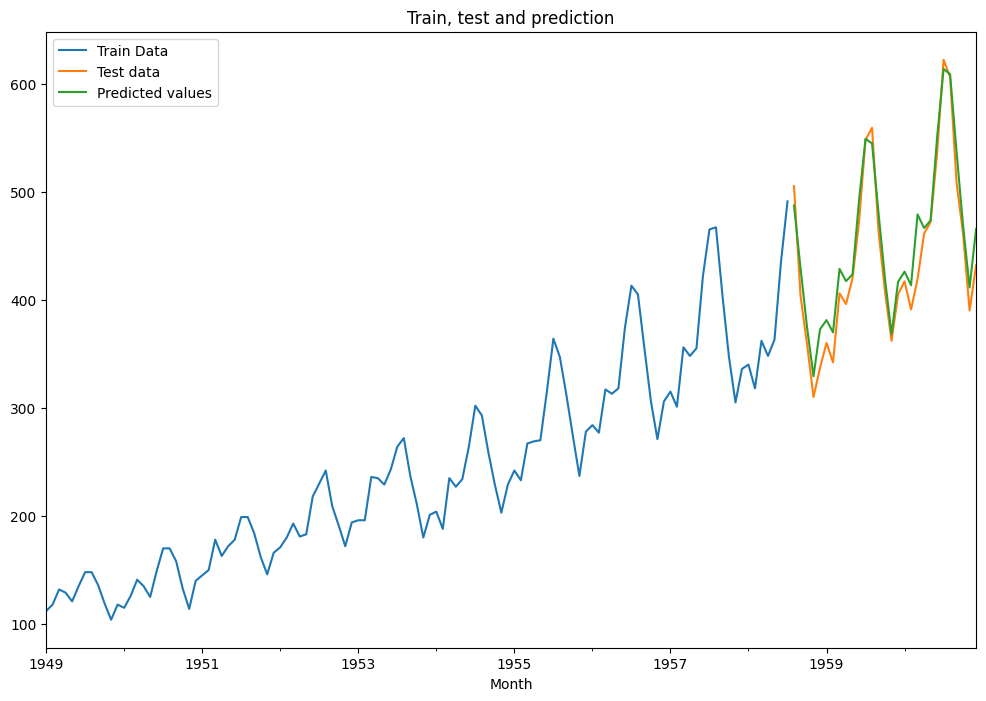

In [ ]:
passengers['Passengers_Thousands'].plot(legend=True, label='Train Data')
passenger_test['Passengers_Thousands'].plot(legend=True, label='Test data', figsize=(12,8))
Predictions.plot(legend=True, label='Predicted values')

plt.title('Train, test and prediction')

## Calculation of performance measures

<Axes: xlabel='Month'>

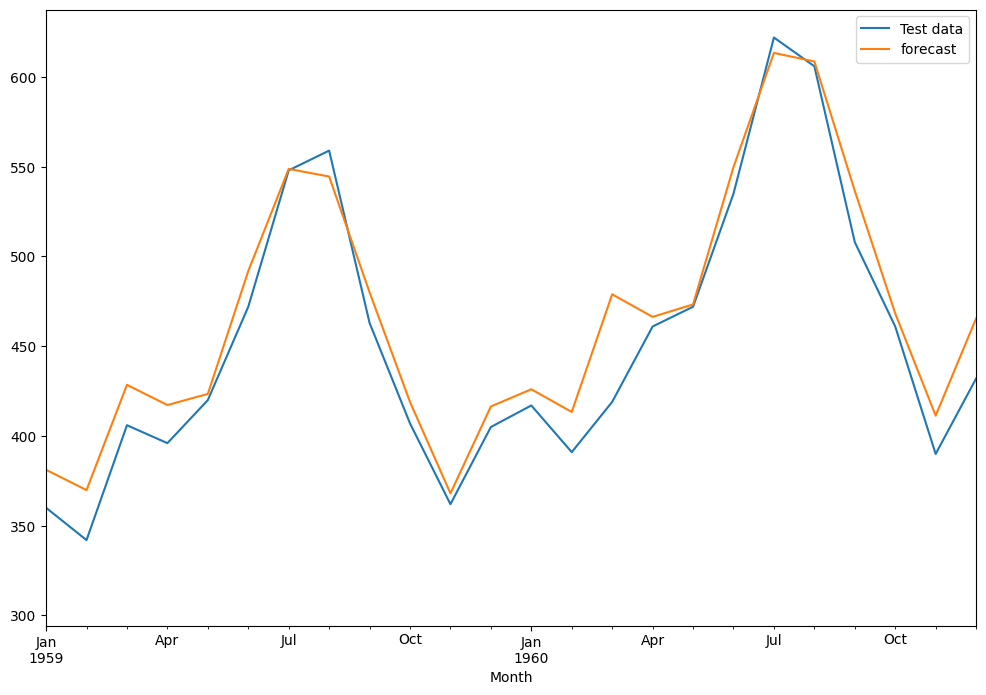

In [ ]:
passenger_test['Passengers_Thousands'].plot(legend=True, label='Test data', figsize=(12,8))
Predictions.plot(legend=True, label='forecast', xlim=["1959-1","1960-12"])


In [ ]:
print('Mean Absolute Error =', mean_absolute_error(passenger_test,Predictions))

Mean Absolute Error = 17.46409614900067


In [ ]:
print('Mean AbsoluSquared Error =', mean_squared_error(passenger_test,Predictions))

Mean AbsoluSquared Error = 455.32714496737685
